In [11]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# load dataset
df=pd.read_excel('no-noise_7_points.xlsx')
df.head()

,r_new,cluster
0,0.506443,10
1,0.505297,10
2,0.504555,10
3,0.504149,10
4,0.505245,10


In [12]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3'],axis=0, inplace=True)
array = df.values
irr=df['r_new']
tar=df['cluster']
x=array[:,0:]
y=array[:,1]

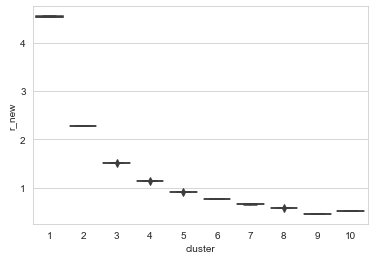

In [13]:
import seaborn as sns
sns.set_style("whitegrid") 
  
z=sns.boxplot(x = 'cluster', y = 'r_new', data = df) 

In [14]:
df.groupby(['cluster']).describe()

r_new                                                              \
        count      mean       std       min       25%       50%       75%   
cluster                                                                     
1         7.0  4.543218  0.005850  4.534255  4.540112  4.544215  4.546296   
2         7.0  2.272438  0.002180  2.269834  2.270803  2.271822  2.274085   
3         7.0  1.515717  0.000564  1.514670  1.515579  1.515687  1.516007   
4         7.0  1.134735  0.000969  1.133869  1.134071  1.134570  1.134932   
5         7.0  0.909444  0.001255  0.908196  0.908587  0.909392  0.909709   
6         7.0  0.757344  0.001378  0.755547  0.756433  0.757492  0.758076   
7         7.0  0.648592  0.000774  0.647315  0.648230  0.648471  0.649228   
8         7.0  0.567948  0.000802  0.566349  0.567802  0.568037  0.568431   
9         7.0  0.454058  0.000815  0.452890  0.453569  0.453978  0.454693   
10        7.0  0.505471  0.000995  0.504149  0.504900  0.505297  0.506031   

                   
              max  
cluster            
1        4.551238  
2        2.275632  
3        1.516485  
4        1.136700  
5        0.911926  
6        0.759349  
7        0.649438  
8        0.568788  
9        0.455018  
10       0.506990

# RF

In [15]:
rf=RandomForestClassifier()
rf.fit(x,y)
rf_score=cross_val_score(rf,x,y,cv=5,scoring='accuracy')
rf_score.mean()

1.0

In [17]:
rf_ypred=cross_val_predict(rf,x,y,cv=5)

In [19]:
cm=confusion_matrix(y,rf_ypred)

In [37]:
labels = ['actual', 'predicted']

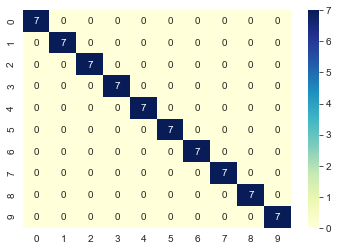

In [39]:
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [22]:
precision_score(y,rf_ypred,average='weighted')

1.0

In [23]:
recall_score(y,rf_ypred,average='weighted')

1.0

In [24]:
f1_score(y,rf_ypred,average='weighted')

1.0

# CART

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
dt_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
dt_score.mean()

1.0

In [26]:
dt_ypred=cross_val_predict(dt,x,y,cv=5)

In [27]:
confusion_matrix(y,dt_ypred)

array([[7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 7]], dtype=int64)

In [28]:
precision_score(y,dt_ypred,average='weighted')

1.0

In [29]:
recall_score(y,dt_ypred,average='weighted')

1.0

In [30]:
f1_score(y,dt_ypred,average='weighted')

1.0

# Naive Bayes

In [31]:
nb=GaussianNB()
nb.fit(x,y)
nb_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
nb_score.mean()

1.0

In [32]:
nb_ypred=cross_val_predict(nb,x,y,cv=5)

In [33]:
confusion_matrix(y,nb_ypred)

array([[7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 7]], dtype=int64)

In [34]:
precision_score(y,nb_ypred,average='weighted')

1.0

In [35]:
recall_score(y,nb_ypred,average='weighted')

1.0

In [36]:
f1_score(y,nb_ypred,average='weighted')

1.0